# Fermipy tutorial - PKS2155-304

This tutorial shows how to perform Fermi-LAT analysis with the Fermipy Python package. 
Many parts of this tutorial are taken directly from the documentation page of Fermipy: [fermipy.readthedocs](http://fermipy.readthedocs.io/en/latest/).
I suggest to visit the documentation page to find further informations.

Fermipy is a python package created by Mattew Wood and maintained by a wide community of people. Fermipy facilitates analysis of data from the Large Area Telescope (LAT) with the Fermi Science Tools.
The Fermipy package is built on the pyLikelihood interface of the Fermi Science Tools and provides a set of high-level tools for performing common analysis tasks:
* Data and model preparation with the gt-tools (gtselect, gtmktime, etc.).
* Extracting a spectral energy distribution (SED) of a source.
* Generating TS and residual maps for a region of interest.
* Finding new source candidates.
* Localizing a source or fitting its spatial extension.
* Perfoming phase analysis
* Calculating light curves
* Deriving the sensitivity of gamma-ray sources with a specific SED and spatial morphology.

## Installation

Instruction on how to install in SLAC machines or in your laptop Fermipy are available at this page: [fermipy.installation](http://fermipy.readthedocs.io/en/latest/install.html).
Fermipy is only compatible with Science Tools v10r0p5 or later. If you are using an earlier version, you will need to download and install the latest version from the [FSSC](https://fermi.gsfc.nasa.gov/ssc/). Note that it is recommended to use the non-ROOT binary distributions of the Science Tools. These instructions assume that you want to run Fermipy on the SLAC machines.

With these instructions you will create your own Conda installation and you will install all the packages needed to use FermiPy and Science Tools.
Using your own Conda installation avoids conflicts with package versions because you build your own environment.

First grab the installation and setup scripts from the fermipy github repository:

In [1]:
# ! curl -OL https://raw.githubusercontent.com/fermiPy/fermipy/master/condainstall.sh
# ! curl -OL https://raw.githubusercontent.com/fermiPy/fermipy/master/slacsetup.sh

Now choose an installation path. This should be a new directory (e.g. $HOME/anaconda) that has at least 2-4 GB available. We will assign this location to the CONDABASE environment variable which is used by the setup script to find the location of your python installation. To avoid setting this every time you log in it's recommended to set CONDABASE into your .bashrc file.

Now run the following commands to install anaconda and fermipy. This will take about 5-10 minutes.

In [2]:
# export CONDABASE=<path to install directory>
# bash condainstall.sh $CONDABASE

Once anaconda is installed you will initialize your python and ST environment by running the slacsetup function in slacsetup.sh. This function will set the appropriate environment variables needed to run the STs and python.

In [3]:
# source slacsetup.sh
# slacsetup

For convenience you can also copy this function into your .bashrc file so that it will automatically be available when you launch a new shell session. By default the function will setup your environment to point to a recent version of the STs and the installation of python in CONDABASE. If CONDABASE is not defined then it will use the installation of python that is packaged with a given release of the STs. The slacsetup function takes two optional arguments which can be used to override the ST version or python installation path.

In [4]:
# Use ST 10-00-05
# slacsetup 10-00-05
# Use ST 11-01-01 and python distribution located at <PATH>
# slacsetup 11-01-01 <PATH>

The installation script only installs packages that are required by fermipy and the STs. Once you've initialized your shell environment you are free to install additional python packages with the conda package manager tool with conda install <package name>. Packages that are not available on conda can also be installed with pip.

conda install fermipy

conda can also be used to upgrade packages. For instance you can upgrade fermipy to the newest version with the conda update command:

In [5]:
# conda update fermipy

If you want to make development of Fermipy you should get the github version making:

In [6]:
# git clone https://github.com/fermiPy/fermipy.git

Then you should create a branch using:

In [7]:
# git checkout -b mattia-dev

In the branch you can make your development of Fermipy and then use the git commands to merge them to the master repository.

More informations on how to install Fermipy are available here: [fermipy-install](http://fermipy.readthedocs.io/en/latest/install.html)

## Download the raw files

The files can be obtained from the [Fermi SSC website](https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi). The following data selection choices were made:

* Object name or coordinates: 302.25,-44.37
* Coordinate system: GAL
* Search radius (degrees): 12
* Observation dates: 239557417,512994417
* Time system: MET
* Energy range (MeV): 100,500000
* LAT data type: Photon
* Spacecraft data: yes

The raw data with these selections can be downloaded using wget.

In [8]:
# # Set up a subdirectory for the data
# !mkdir -p SMC_data/PH
# !mkdir -p SMC_data/SC

# # Download the data and place into the subdirectory
# !wget -P ./SMC_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240613164330AE56FF4635_PH00.fits
# !wget -P ./SMC_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240613164330AE56FF4635_PH01.fits
# !wget -P ./SMC_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240613164330AE56FF4635_PH02.fits
# !wget -P ./SMC_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240613164330AE56FF4635_PH03.fits
# !wget -P ./SMC_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240613164330AE56FF4635_PH04.fits
# !wget -P ./SMC_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240613164330AE56FF4635_PH05.fits
# !wget -P ./SMC_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240613164330AE56FF4635_PH06.fits

# !wget -P ./SMC_data/SC/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L240613164330AE56FF4635_SC00.fits

# # Make a file list
# !ls ./SMC_data/PH/*PH*.fits > ./SMC_data/PH.txt

Note that processing the raw photon and spacecraft files can take multiple hours. Alternatively, you can download the pre-processed data from github.

In [9]:
#import os
#if os.path.isfile('./../data/SMC_data.tar.gz'):
#    !tar xzf ./../data/SMC_data.tar.gz
#else:
#    !wget -P ./../data/ https://raw.githubusercontent.com/fermiPy/fermipy-extras/master/data/SMC_data.tar.gz
#    !tar xzf ./../data/SMC_data.tar.gz

## Configuration file:

The first step is to compose a configuration file that defines the data selection and analysis parameters. Fermipy uses YAML files to read and write its configuration in a persistent format. The configuration file has a hierarchical structure that groups parameters into dictionaries that are keyed to a section name (data, binning, etc.). Below I report a sample of configuration applied for an analysis of the SMC:

In [10]:
import os
import numpy as np
from fermipy.gtanalysis import GTAnalysis
from fermipy.plotting import ROIPlotter, SEDPlotter
import matplotlib.pyplot as plt
import matplotlib

In [11]:
!cat ./PKS2155_data/config.yaml

data:
  evfile : './PKS2155_data/PKS2155.lst'
  scfile : './PKS2155_data/L211025154921445A2D9929_SC00.fits'
#  ltcube : 'ltcube_00.fits'

binning:
  roiwidth   : 12.0
  binsz      : 0.08
  binsperdec : 8

selection :
  emin : 100
  emax : 300000
  tmin : 241401601
  tmax : 257385601
  zmax    : 105
  evclass : 128
  evtype  : 3
  target : 'PKS 2155-304'

gtlike:
  edisp : True
  irfs : 'P8R2_SOURCE_V6'
  edisp_disable : ['isodiff','galdiff']

model:
  src_roiwidth : 12.0
  galdiff  : '$FERMI_DIFFUSE_DIR/gll_iem_v07.fits'
  isodiff  : '$FERMI_DIFFUSE_DIR/iso_P8R2_SOURCE_V6_v06.txt' 
  catalogs: gll_psc_v16.fit
  
fileio:
  usescratch: False
  outdir : PKS2155_data

The configuration file has the same structure as the configuration dictionary such that one can read/write configurations using the load/dump methods of the yaml module:

In [12]:
import yaml
# Load a configuration
config = yaml.load(open('./PKS2155_data/config.yaml'), Loader=yaml.FullLoader)
# Update a parameter and write a new configuration
config['selection']['emin'] = 1000.
yaml.dump(config, open('new_PKS_config.yaml','w'))

The data section defines the input data set and spacecraft file for the analysis. Here evfile points to a list of FT1 files that encompass the chosen ROI, energy range, and time selection.
The parameters in the binning section define the dimensions of the ROI and the spatial and energy bin size.
The selection section defines parameters related to the data selection (energy range, zmax cut, and event class/type). The target parameter in this section defines the ROI center to have the same coordinates as the given source.
The model section defines parameters related to the ROI model definition (diffuse templates, point sources).
Fermipy gives the user the option to combine multiple data selections into a joint likelihood with the components section. For more informations on this visit: http://fermipy.readthedocs.io/en/latest/quickstart.html

Note that the setup for a joint analysis is identical to the above except for the modification to the components section.  The following example shows the components configuration one would use to define a joint analysis with the four PSF event types:
```python
components:
  - { selection : { evtype : 4  } }
  - { selection : { evtype : 8  } }
  - { selection : { evtype : 16 } }
  - { selection : { evtype : 32 } }
```

## Start your run

First of all you need to load the configuration file, create the object gta and run the tool gta.setup that implements the ST gtselect, gtmktime, gtbin, gtexpcube, gtsrcmap tools

Begin the setup routine. As most of the files are included, only the source-map should be created. Will take ~5min.

In [14]:
gta = GTAnalysis('new_PKS_config.yaml')
gta.setup()

2024-09-24 18:20:00 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 1.3.0 
ScienceTools version 2.2.0


{'Prefactor': 0, 'Index1': 1, 'Scale': 2, 'Cutoff': 3, 'Index2': 4}


2024-09-24 18:20:00 INFO    GTAnalysis.setup(): Running setup.
2024-09-24 18:20:00 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2024-09-24 18:20:00 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2024-09-24 18:20:00 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/evfile_00.txt outfile=/home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/ft1_00.fits ra=329.7203063964844 dec=-30.2268009185791 rad=8.985281374238571 tmin=241401601.0 tmax=257385601.0 emin=1000.0 emax=300000.0 zmin=0.0 zmax=105.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2024-09-24 18:20:01 INFO    GTBinnedAnalysis.run_gtapp(): This is gtselect version HEAD
2024-09-24 18:20:01 INFO    GTBinnedAnalysis.run_gtapp(): Applying filter string: ((EVENT_CLASS&o200) != o0) && angsep(RA,DEC,329.7203064,-30.22680092) < 8.985281374 && ((EVENT_TYPE&o

{'Prefactor': 0, 'Index1': 1, 'Scale': 2, 'Cutoff': 3, 'Index2': 4}


2024-09-24 18:20:01 INFO    GTBinnedAnalysis.run_gtapp(): Done.
2024-09-24 18:20:01 INFO    GTBinnedAnalysis.run_gtapp(): Finished gtselect. Execution time: 0.26 s
2024-09-24 18:20:01 INFO    GTBinnedAnalysis.run_gtapp(): Running gtltcube.
2024-09-24 18:20:01 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtltcube evfile="/home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/ft1_00.fits" evtable="EVENTS" scfile=./PKS2155_data/L211025154921445A2D9929_SC00.fits sctable="SC_DATA" outfile=/home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/ltcube_00.fits dcostheta=0.025 binsz=1.0 phibins=0 tmin=0.0 tmax=0.0 file_version="1" zmin=0.0 zmax=105.0 chatter=2 clobber=yes debug=no gui=no mode="ql"
2024-09-24 18:20:01 INFO    GTBinnedAnalysis.run_gtapp(): Working on file ./PKS2155_data/L211025154921445A2D9929_SC00.fits
2024-09-24 18:28:48 INFO    GTBinnedAnalysis.run_gtapp(): .....................!
2024-09-24 18:28:48 INFO    GTBinnedAnalysis.run_gtapp(): Finished gtltcube. Execution 

In [15]:
gta.print_model()

2024-09-24 18:31:24 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J2158.8-3013      0.000   2.204  0.000138   1.85       nan       467.3     
3FGL J2151.8-3025      1.539   2.031   9.5e-07   4.40       nan        13.5     
3FGL J2159.2-2841      1.542   0.393  2.72e-06   1.94       nan         9.0     
3FGL J2151.6-2744      2.948   1.013  8.19e-07   2.51       nan         6.2     
3FGL J2144.9-3356      4.743   2.950  4.25e-06   2.30       nan        24.5     
3FGL J2213.1-2532      5.650   0.351  1.32e-06   2.55       nan        10.1     
3FGL J2142.2-2546      5.760   0.364  1.68e-06   2.23       nan         9.0     
3FGL J2222.3-3500      6.878   0.394  7.72e-07   2.37       nan         4.6     
isodiff                  ---   1.000    0.0301   2.12       nan       472.1     
galdiff                  ---   1.000      0.13   0.00 

In [16]:
gta.free_sources()
gta.fit()

2024-09-24 18:31:34 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2158.8-3013     : ['norm', 'alpha', 'beta']
2024-09-24 18:31:34 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2151.8-3025     : ['norm', 'alpha', 'beta']
2024-09-24 18:31:34 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2159.2-2841     : ['Prefactor', 'Index']
2024-09-24 18:31:34 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2151.6-2744     : ['Prefactor', 'Index']
2024-09-24 18:31:34 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2144.9-3356     : ['Prefactor', 'Index']
2024-09-24 18:31:34 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2213.1-2532     : ['Prefactor', 'Index']
2024-09-24 18:31:34 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2142.2-2546     : ['Prefactor', 'Index']
2024-09-24 18:31:34 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2222.3-3500     : ['Prefactor', 'Index']
20

Drm_Cache::update Measured counts < 0 3FGL J2151.8-3025 19 -2.86633e-14 4.66044e-13
2.65931 1.80298 1.05619 0.536945 0.237817 0.0924885 0.0319272 0.00991039 0.00270209 0.000648556 0.00013762 2.60488e-05 4.41123e-06 6.54526e-07 8.47181e-08 9.65071e-09 9.69929e-10 8.59364e-11 6.7331e-12 4.66044e-13 


2024-09-24 18:31:35 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2024-09-24 18:31:35 INFO    GTAnalysis.fit(): LogLike:    -8721.929 DeltaLogLike:       24.835 


{'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'dloglike': 24.83531423709792,
 'edm': 0.00014450939796931605,
 'loglike': -8721.928683972012,
 'covariance': array([[ 1.64517549e-02,  9.98976778e-02,  2.40325744e-03,
          1.78549944e-05,  6.47085767e-04, -2.67066184e-04,
          8.30831196e-08, -1.14307600e-05,  2.42433636e-05,
          1.46352663e-04,  1.36991604e-05, -2.03836407e-07,
          1.46957003e-04,  1.48324427e-04,  1.57456561e-04,
          1.85504828e-04,  1.59325310e-04,  7.30971390e-05,
         -5.86941887e-04,  1.55406169e-04,  5.12244240e-04],
        [ 9.98976778e-02,  2.21893970e+00,  1.97025691e-02,
          1.28024601e-03,  4.73259364e-03,  4.91550635e-04,
          6.16536895e-07, -4.34650389e-05,  3.16358628e-04,
          1.09160903e-03,  3.43637380e-04, -5.61991924e-05,
          3.82915910e-04,  7.32792720e-04,  9.92266925e-04,
          1.65570110e-03,  9.05920776e-04,  1.29155169e-03,
         -3.71694712e-03, -2.17909316e-03,  1.9800

## Output files

The current state of the ROI can be written at any point by calling write_roi.

2024-09-24 18:32:09 INFO    GTBinnedAnalysis.write_xml(): Writing /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/initial_00.xml...
2024-09-24 18:32:09 INFO    GTAnalysis.write_fits(): Writing /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/initial.fits...
2024-09-24 18:32:17 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2024-09-24 18:32:19 INFO    GTAnalysis.write_roi(): Writing /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/initial.npy...


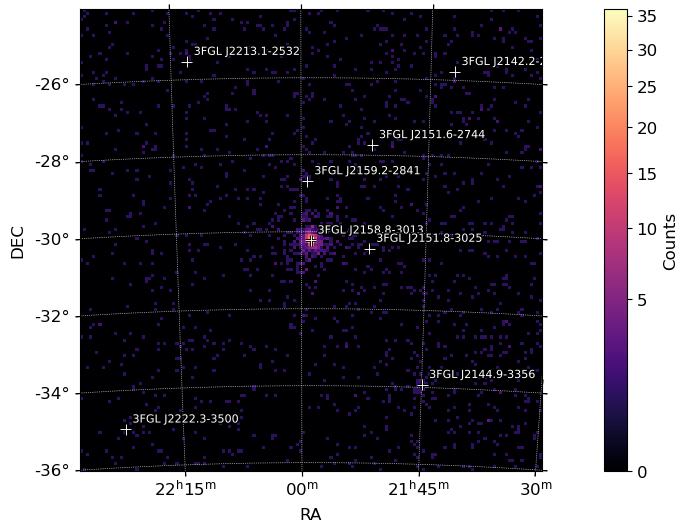

In [18]:
gta.write_roi('initial',make_plots=True,save_model_map=True)
plt.show()

The output file will contain all information about the state of the ROI as calculated up to that point in the analysis including model parameters and measured source characteristics (flux, TS, NPred). An XML model file will also be saved for each analysis component.

The output file can be read with load:

In [19]:
gta.load_roi('initial')

2024-09-24 18:32:30 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/initial.npy
2024-09-24 18:32:30 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2024-09-24 18:32:34 INFO    GTAnalysis.load_roi(): Finished Loading ROI


Using gta.print_model You have an overview of the sources and components present in the ROI.

In [20]:
gta.print_model()

2024-09-24 18:32:35 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J2158.8-3013      0.000   2.798  0.000176   1.87   3439.09       573.6    *
3FGL J2151.8-3025      1.539   0.000  9.83e-07   4.78      8.41        11.9    *
3FGL J2159.2-2841      1.542   0.384  5.58e-06   1.61     21.16         9.1    *
3FGL J2151.6-2744      2.948   1.879  4.05e-07   3.48      1.51         5.1    *
3FGL J2144.9-3356      4.743   9.384  4.04e-06   2.99     73.33        41.2    *
3FGL J2213.1-2532      5.650   0.258  1.94e-06   2.26     10.72        10.9    *
3FGL J2142.2-2546      5.760   0.038  3.34e-07   1.96      0.14         1.2    *
3FGL J2222.3-3500      6.878   0.452  1.06e-06   2.29      4.28         5.7    *
isodiff                  ---   0.600     0.018   2.12     38.40       283.1    *
galdiff                  ---   0.964     0.152  -0.12 

## Source Dictionary

The sources dictionary contains one element per source keyed to the source name. It is possible to have access to a lot of informations concerning each source of model.

In [21]:
print(gta.roi.sources[0].name) #NAME OF THE SOURCE
print(gta.roi[gta.roi.sources[0].name]) #NAME OF THE SOURCE
print(gta.roi[gta.roi.sources[0].name]['glon']) #Longitude OF THE SOURCE
print(gta.roi[gta.roi.sources[0].name]['glat']) #Latitude OF THE SOURCE
print(gta.roi[gta.roi.sources[0].name]['flux']) #Flux OF THE SOURCE
print(gta.roi[gta.roi.sources[0].name]['npred']) #npred OF THE SOURCE

3FGL J2158.8-3013
Name           : 3FGL J2158.8-3013
Associations   : ['3FGL J2158.8-3013', 'PKS 2155-304', '1FHL J2158.8-3013', '2FGL J2158.8-3013', '3EG J2158-3023']
RA/DEC         :    329.720/   -30.227
GLON/GLAT      :     17.729/   -52.249
TS             : 3439.09
Npred          : 573.63
Flux           : 2.682e-08 +/- 1.21e-09
EnergyFlux     :  0.000176 +/- 1.98e-05
SpatialModel   : PointSource
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :  2.798e-11 +/-   2.85e-12
b'alpha'       :       1.81 +/-     0.1283
b'beta'        :     0.0232 +/-    0.03027
b'Eb'          :        904 +/-        nan
17.729041394470233
-52.24887533395459
2.68229777010604e-08
573.6348440388637


Other possible outputs are listed here [fermipy/sourcedictionary](http://fermipy.readthedocs.io/en/latest/output.html)

In [23]:
gta.free_shape(gta.roi.sources[0].name,free=False) #Free or fix the index
gta.get_free_source_params(gta.roi.sources[0].name) #Free or fix parameters for a source
gta.set_parameter(gta.roi.sources[0].name,par='alpha',value=2.0,scale=-1.0,bounds=[-2.,5.]) #Change the value and bounds for a parameter of a source

You can always use gta.print_model() to have a summary of you model.

In [24]:
gta.print_model()

2024-09-24 18:33:41 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J2158.8-3013      0.000   2.798  0.000103   2.06   3398.54       463.3    *
3FGL J2151.8-3025      1.539   0.000  9.83e-07   4.78      8.41        11.9    *
3FGL J2159.2-2841      1.542   0.384  5.58e-06   1.61     21.16         9.1    *
3FGL J2151.6-2744      2.948   1.879  4.05e-07   3.48      1.51         5.1    *
3FGL J2144.9-3356      4.743   9.384  4.04e-06   2.99     73.33        41.2    *
3FGL J2213.1-2532      5.650   0.258  1.94e-06   2.26     10.72        10.9    *
3FGL J2142.2-2546      5.760   0.038  3.34e-07   1.96      0.14         1.2    *
3FGL J2222.3-3500      6.878   0.452  1.06e-06   2.29      4.28         5.7    *
isodiff                  ---   0.600     0.018   2.12     38.40       283.1    *
galdiff                  ---   0.964     0.152  -0.12 

## Customizing your model

The ROIModel class is responsible for managing the source and diffuse components in the ROI. Configuration of the model is controlled with the model block of YAML configuration file.

DIFFUSE AND ISOTROPIC TEMPLATES

The simplest configuration uses a single file for the galactic and isotropic diffuse components. By default the galactic diffuse and isotropic components will be named galdiff and isodiff respectively. An alias for each component will also be created with the name of the mapcube or file spectrum. For instance the galactic diffuse can be referred to as galdiff or gll_iem_v06 in the following example.

To define two or more galactic diffuse components you can optionally define the galdiff and isodiff parameters as lists. A separate component will be generated for each element in the list with the name galdiffXX or isodiffXX where XX is an integer position in the list.

SOURCE COMPONENT

The list of sources for inclusion in the ROI model is set by defining a list of catalogs with the catalogs parameter. Catalog files can be in either XML or FITS format. Sources from the catalogs in this list that satisfy either the src_roiwidth or src_radius selections are added to the ROI model. If a source is defined in multiple catalogs the source definition from the last file in the catalogs list takes precedence.

Individual sources can also be defined within the configuration file with the sources parameter. This parameter contains a list of dictionaries that defines the spatial and spectral parameters of each source. The keys of the source dictionary map to the spectral and spatial source properties as they would be defined in the XML model file.

Or you can do it while you are running your script with:

In [27]:
gta.delete_source(gta.roi.sources[0].name)
glon0 = gta.config['selection']['glon']
glat0 = gta.config['selection']['glat']
gta.add_source('PKS2155-304', dict(glon=glon0, glat=glat0, Index=dict(value=-2.4,scale=1.0,max="-1.",min="-5."), Scale=dict(value=1e3,scale=1.0,max="1e5",min="1e0"), Prefactor=dict(value=1.0,scale=1e-13,max="10000.0", min="0.0001"), SpectrumType='PowerLaw'), free=True, init_source=True, save_source_maps=True)
gta.print_model()

2024-09-24 18:34:57 INFO    GTAnalysis.delete_source(): Deleting source PKS2155-304
2024-09-24 18:34:57 INFO    GTAnalysis.add_source(): Adding source PKS2155-304
2024-09-24 18:34:58 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
PKS2155-304            0.000   1.000  2.24e-07   2.40       nan         1.6    *
3FGL J2151.8-3025      1.539   0.000  9.83e-07   4.78      8.41        11.9    *
3FGL J2159.2-2841      1.542   0.384  5.58e-06   1.61     21.16         9.1    *
3FGL J2151.6-2744      2.948   1.879  4.05e-07   3.48      1.51         5.1    *
3FGL J2144.9-3356      4.743   9.384  4.04e-06   2.99     73.33        41.2    *
3FGL J2213.1-2532      5.650   0.258  1.94e-06   2.26     10.72        10.9    *
3FGL J2142.2-2546      5.760   0.038  3.34e-07   1.96      0.14         1.2    *
3FGL J2222.3-3500      6.878   0.452  1.06e-06   2.29

All sources have nan because we have not done yet a fit do the ROI. Moreover in the model above all sources are fixed. In order to free the parameters of the source it's enough to make gta.free_sources()

In [28]:
gta.free_sources()
gta.print_model()

2024-09-24 18:35:10 INFO    GTAnalysis.free_source(): Freeing parameters for PKS2155-304           : ['Index']
2024-09-24 18:35:10 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
PKS2155-304            0.000   1.000  2.24e-07   2.40       nan         1.6    *
3FGL J2151.8-3025      1.539   0.000  9.83e-07   4.78      8.41        11.9    *
3FGL J2159.2-2841      1.542   0.384  5.58e-06   1.61     21.16         9.1    *
3FGL J2151.6-2744      2.948   1.879  4.05e-07   3.48      1.51         5.1    *
3FGL J2144.9-3356      4.743   9.384  4.04e-06   2.99     73.33        41.2    *
3FGL J2213.1-2532      5.650   0.258  1.94e-06   2.26     10.72        10.9    *
3FGL J2142.2-2546      5.760   0.038  3.34e-07   1.96      0.14         1.2    *
3FGL J2222.3-3500      6.878   0.452  1.06e-06   2.29      4.28         5.7    *
isodiff                 

It is also possible to free only the sources that are at a certain angular distance from a source. For example below we free the sources that are 2 degrees away from 3FGL J0322.5-3721:

In [29]:
gta.free_sources(free=False)
gta.free_sources(skydir=gta.roi[gta.roi.sources[0].name].skydir,distance=[3.0],free=True)
gta.print_model()

2024-09-24 18:35:16 INFO    GTAnalysis.free_source(): Fixing parameters for PKS2155-304           : ['Prefactor', 'Index']
2024-09-24 18:35:16 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2151.8-3025     : ['norm', 'alpha', 'beta']
2024-09-24 18:35:16 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2159.2-2841     : ['Prefactor', 'Index']
2024-09-24 18:35:16 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2151.6-2744     : ['Prefactor', 'Index']
2024-09-24 18:35:16 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2144.9-3356     : ['Prefactor', 'Index']
2024-09-24 18:35:16 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2213.1-2532     : ['Prefactor', 'Index']
2024-09-24 18:35:16 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2142.2-2546     : ['Prefactor', 'Index']
2024-09-24 18:35:16 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2222.3-3500     : ['Prefactor', 'Index']
2024-09-24 18

## Fit Roi

Source fitting with fermipy is generally performed with the optimize and fit methods.
fit is a wrapper on the pyLikelihood fit method and performs a likelihood fit of all free parameters of the model. This method can be used to manually optimize of the model by calling it after freeing one or more source parameters.

In [36]:
gta.print_model()
gta.free_sources(free=True)
gta.print_model()
first_fit=gta.fit()
gta.print_model()
gta.write_roi('PKS_firstfit',make_plots=True,save_model_map=True)

2024-09-24 18:38:34 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
PKS2155-304            0.000 232.686  0.000182   1.89   3437.83       574.2    *
3FGL J2151.8-3025      1.539   0.000  9.76e-07   4.77      8.30        11.8    *
3FGL J2159.2-2841      1.542   0.381  5.61e-06   1.60     21.12         9.0    *
3FGL J2151.6-2744      2.948   1.879  4.05e-07   3.48      1.51         5.1    *
3FGL J2144.9-3356      4.743   9.416  4.04e-06   3.00     73.37        41.2    *
3FGL J2213.1-2532      5.650   0.260  1.94e-06   2.27     10.73        10.9    *
3FGL J2142.2-2546      5.760   0.038  3.18e-07   1.99      0.14         1.2    *
3FGL J2222.3-3500      6.878   0.452  1.06e-06   2.29      4.29         5.7    *
isodiff                  ---   0.598     0.018   2.12     38.17       282.4    *
galdiff                  ---   0.963     0.153  -0.12 

By default fit will repeat the fit until a fit quality of 3 is obtained. After the fit returns all sources with free parameters will have their properties (flux, TS, NPred, etc.) updated in the ROIModel instance. The return value of the method is a dictionary containing the following diagnostic information about the fit.

The fit also accepts keyword arguments which can be used to configure its behavior at runtime:

In [37]:
print(first_fit['fit_quality'])
print(first_fit['errors'])
print(first_fit['loglike'])
print(first_fit['values'])

3
[1.15345327e-01 1.34695809e+00 3.50025112e+00 3.81070528e-01
 2.79552696e+00 1.54247375e+00 4.53075387e-04 6.32406770e-01
 2.61317984e-01 2.30534748e-01 3.60597225e-01 2.39119264e-01
 4.91913318e-01 4.45326729e-01 7.06288105e-01 1.63940743e+01
 4.26719888e-02 9.12532619e-02 6.49177768e-02 1.90330866e-01]
-8722.232538440305
[ 3.80121004e-02  1.97491895e+00  9.37781111e+00  2.99180643e+00
  1.87015960e+00  3.47383565e+00  2.59131031e-04 -4.95196385e+00
  1.82085760e+00  3.80575156e-01  1.60357772e+00  2.59275716e-01
  2.26592543e+00  4.52481936e-01  2.28613292e+00  2.44037751e+02
 -1.90351598e+00  9.63968362e-01 -1.18135567e-01  5.95691862e-01]


In [38]:
print(gta.roi.sources[0]['param_names'])
print(gta.roi.sources[0]['param_values'])
print(gta.roi.sources[0]['param_errors'])

[b'Prefactor' b'Index' b'Scale' b'' b'' b'' b'' b'' b'' b'']
[ 2.44037751e-11 -1.90351598e+00  1.00000000e+03             nan
             nan             nan             nan             nan
             nan             nan]
[1.63940743e-12 4.26719888e-02            nan            nan
            nan            nan            nan            nan
            nan            nan]


The optimize method performs an automatic optimization of the ROI by fitting all sources with an iterative strategy. It is generally good practice to run this method once at the start of your analysis to ensure that all parameters are close to their global likelihood maxima.

In [39]:
gta.load_roi('initial')
gta.print_model()

2024-09-24 18:38:47 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/initial.npy
2024-09-24 18:38:47 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2024-09-24 18:38:51 INFO    GTAnalysis.load_roi(): Finished Loading ROI
2024-09-24 18:38:51 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J2158.8-3013      0.000   2.798  0.000176   1.87   3439.09       573.6    *
3FGL J2151.8-3025      1.539   0.000  9.83e-07   4.78      8.41        11.9    *
3FGL J2159.2-2841      1.542   0.384  5.58e-06   1.61     21.16         9.1    *
3FGL J2151.6-2744      2.948   1.879  4.05e-07   3.48      1.51         5.1    *
3FGL J2144.9-3356      4.743   9.384  4.04e-06   2.99     73.33        41.2    *
3FGL J2213.1-2532      5.650   0.258  1.94e-06   2.

In [40]:
gta.load_roi('PKS_firstfit')
gta.print_model()

2024-09-24 18:38:51 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/PKS_firstfit.npy
2024-09-24 18:38:51 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2024-09-24 18:38:56 INFO    GTAnalysis.load_roi(): Finished Loading ROI
2024-09-24 18:38:56 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
PKS2155-304            0.000 244.038  0.000186   1.90   3438.13       574.0    *
3FGL J2151.8-3025      1.539   0.000  9.83e-07   4.74      8.31        11.9    *
3FGL J2159.2-2841      1.542   0.381   5.6e-06   1.60     21.11         9.0    *
3FGL J2151.6-2744      2.948   1.870  4.05e-07   3.47      1.50         5.1    *
3FGL J2144.9-3356      4.743   9.378  4.04e-06   2.99     73.34        41.1    *
3FGL J2213.1-2532      5.650   0.259  1.95e-06

## TS Map

tsmap() generates a test statistic (TS) map for an additional source component centered at each spatial bin in the ROI. The methodology is similar to that of the gttsmap ST application but with the following approximations:

* Evaluation of the likelihood is limited to pixels in the vicinity of the test source position.
* The background model is fixed when fitting the test source amplitude.

TS Cube is a related method that can also be used to generate TS maps as well as cubes (TS vs. position and energy).

In [41]:
plt.clf()
tsmap_postfit = gta.tsmap(prefix='TSmap_start',make_plots=True,write_fits=True,write_npy=True)

2024-09-24 19:27:01 INFO    GTAnalysis.tsmap(): Generating TS map
2024-09-24 19:27:01 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-09-24 19:27:09 INFO    GTAnalysis.tsmap(): Finished TS map
2024-09-24 19:27:19 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/TSmap_start_pointsource_powerlaw_2.00_tsmap.npy
2024-09-24 19:27:19 INFO    GTAnalysis.tsmap(): Execution time: 17.86 s


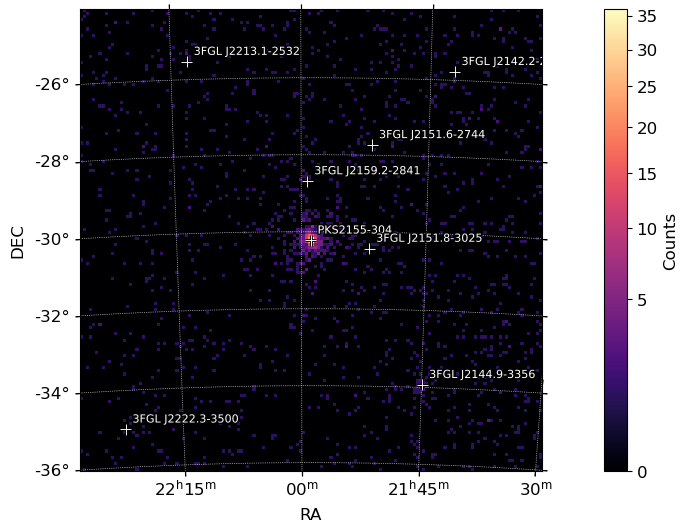

<Figure size 800x600 with 0 Axes>

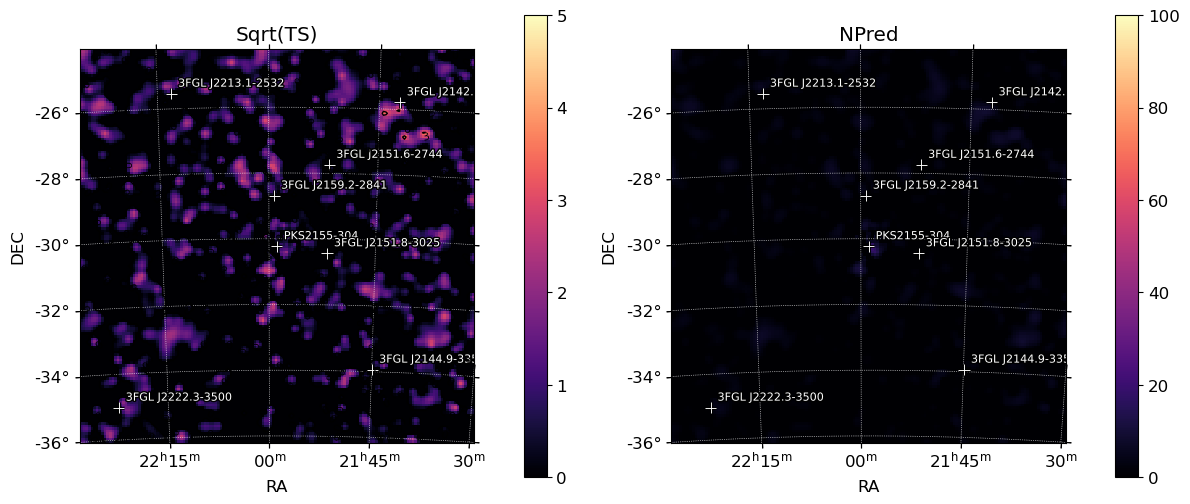

In [42]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_postfit['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,5,7],vmin=0,vmax=5,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_postfit['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')
plt.show()

Looking to the TSmap it is quite clear that the model does not fit sufficiently well the data.

## Residual Map

residmap() calculates the residual between smoothed data and model maps. Whereas a TS map is only sensitive to positive deviations with respect to the model, residmap() is sensitive to both positive and negative residuals and therefore can be useful for assessing the model goodness-of-fit. 

In [43]:
resid = gta.residmap('SMC_postfit',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)

2024-09-24 19:27:34 INFO    GTAnalysis.residmap(): Generating residual maps
2024-09-24 19:27:34 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2024-09-24 19:27:35 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2024-09-24 19:27:37 INFO    GTAnalysis.residmap(): Finished residual maps
2024-09-24 19:27:43 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/SMC_postfit_pointsource_powerlaw_2.00_residmap.npy
2024-09-24 19:27:43 INFO    GTAnalysis.residmap(): Execution time: 8.93 s


<Figure size 640x480 with 0 Axes>

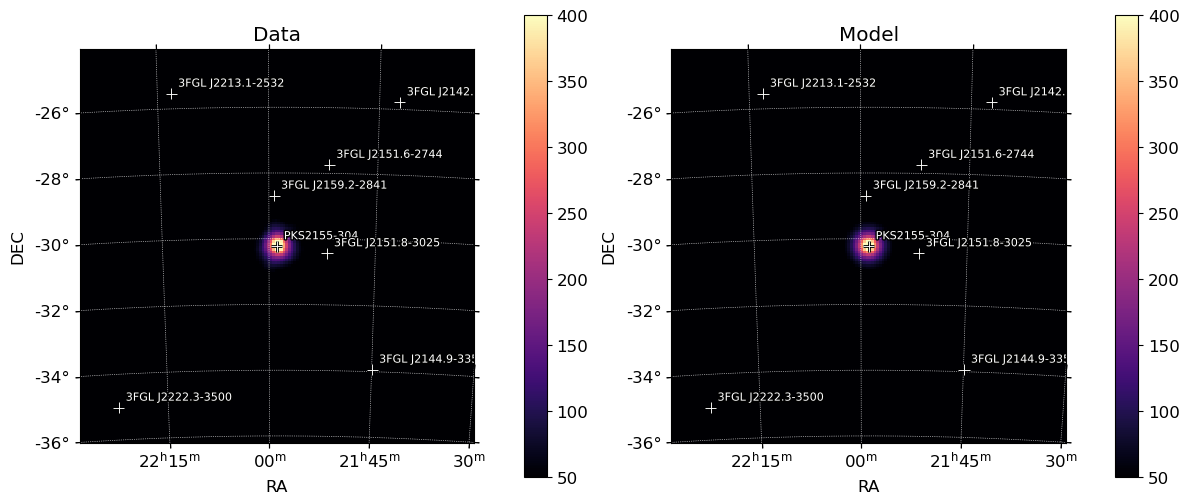

In [44]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['data'],roi=gta.roi).plot(vmin=50,vmax=400,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid['model'],roi=gta.roi).plot(vmin=50,vmax=400,subplot=122,cmap='magma')
plt.gca().set_title('Model')
plt.show()

<Figure size 640x480 with 0 Axes>

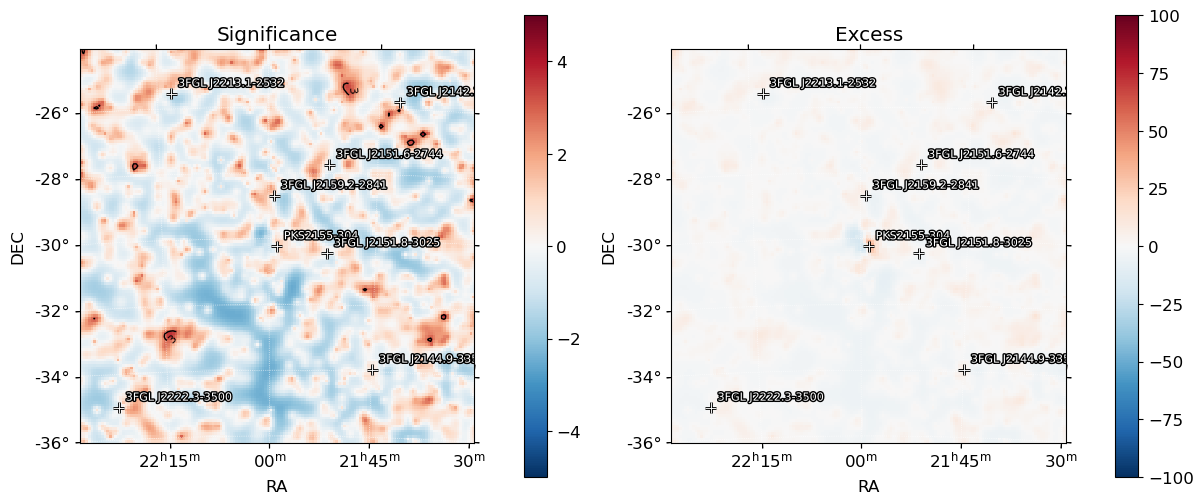

In [45]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')
plt.show()

## Source Localization

The localize() method can be used to spatially localize a source. Localization is performed by scanning the likelihood surface in source position in a local patch around the nominal source position. The fit to the source position proceeds in two iterations:

TS Map Scan: Obtain a first estimate of the source position by generating a likelihood map of the region using the tsmap method. In this step all background parameters are fixed to their nominal values. The size of the search region used for this step is set with the dtheta_max parameter.
Likelihood Scan: Refine the position of the source by performing a scan of the likelihood surface in a box centered on the best-fit position found in the first iteration. The size of the search region is set to encompass the 99% positional uncertainty contour. This method uses a full likelihood fit at each point in the likelihood scan and will re-fit all free parameters of the model.
If a peak is found in the search region and the positional fit succeeds, the method will update the position of the source in the model to the new best-fit position.

In [47]:
gta.free_sources(free=False)
gta.print_model()
gta.free_sources(skydir=gta.roi[gta.roi.sources[0].name].skydir,distance=[3.0],free=True)
gta.print_model()
localpks = gta.localize(gta.roi.sources[0].name, update=True, make_plots=True)
gta.print_model()

2024-09-24 19:29:36 INFO    GTAnalysis.free_source(): Fixing parameters for PKS2155-304           : ['Prefactor', 'Index']
2024-09-24 19:29:36 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2151.8-3025     : ['norm', 'alpha', 'beta']
2024-09-24 19:29:36 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2159.2-2841     : ['Prefactor', 'Index']
2024-09-24 19:29:36 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2151.6-2744     : ['Prefactor', 'Index']
2024-09-24 19:29:36 INFO    GTAnalysis.free_source(): Fixing parameters for isodiff               : ['Normalization']
2024-09-24 19:29:36 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Prefactor', 'Index']
2024-09-24 19:29:36 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
PKS2155-304            0.009 232.713  0.000182 

PKS2155-304 is relocalized at 0.009deg.

In [49]:
print(localpks['glon'])
print(localpks['glat'])
print(localpks['pos_r68'])
print(localpks['pos_r95'])
print(localpks['pos_r99'])
print(localpks['pos_err_semimajor'])
print(localpks['pos_err_semiminor'])
print(localpks['dloglike_loc'])

17.730028344812883
-52.2396077094473
0.008791961331231373
0.014188460076057336
0.017593476546711506
0.005902349857603159
0.00569401693096676
-2.592358214315027e-06


## Extension Fitting

The extension() method executes a source extension analysis for a given source by computing a likelihood ratio test with respect to the no-extension (point-source) hypothesis and a best-fit model for extension. The best-fit extension is found by performing a likelihood profile scan over the source width (68% containment) and fitting for the extension that maximizes the model likelihood. Currently this method supports two models for extension: a 2D Gaussian (RadialGaussian) or a 2D disk (RadialDisk).

By default the method will fix all background parameters before performing the extension fit. One can leave background parameters free by setting free_background=True.

In [51]:
gta.free_sources(free=False)
gta.print_model()
gta.free_sources(skydir=gta.roi[gta.roi.sources[0].name].skydir,distance=[3.0],free=True)
gta.print_model()
extensionpks = gta.extension(gta.roi.sources[0].name,update=True,make_plots=True,sqrt_ts_threshold=3.0,spatial_model='RadialGaussian')
gta.print_model()

2024-09-24 19:30:48 INFO    GTAnalysis.free_source(): Fixing parameters for PKS2155-304           : ['Prefactor', 'Index']
2024-09-24 19:30:48 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2151.8-3025     : ['norm', 'alpha', 'beta']
2024-09-24 19:30:48 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2159.2-2841     : ['Prefactor', 'Index']
2024-09-24 19:30:48 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2151.6-2744     : ['Prefactor', 'Index']
2024-09-24 19:30:48 INFO    GTAnalysis.free_source(): Fixing parameters for isodiff               : ['Normalization']
2024-09-24 19:30:48 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Prefactor', 'Index']
2024-09-24 19:30:48 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
PKS2155-304            0.009 232.710  0.000182 

{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': True, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': True, 'write_fits'

2024-09-24 19:31:04 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/pks2155-304_ext.npy
2024-09-24 19:31:04 INFO    GTAnalysis.extension(): Execution time: 15.96 s
2024-09-24 19:31:04 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
PKS2155-304            0.009 232.710  0.000182   1.89   3664.84       574.2    *
3FGL J2151.8-3025      1.539   0.000  9.83e-07   4.74      8.31        11.9    *
3FGL J2159.2-2841      1.542   0.381   5.6e-06   1.60     21.11         9.0    *
3FGL J2151.6-2744      2.948   1.870  4.05e-07   3.47      1.50         5.1    *
3FGL J2144.9-3356      4.743   9.378  4.04e-06   2.99     73.34        41.1     
3FGL J2213.1-2532      5.650   0.259  1.95e-06   2.27     10.74       

{'name': 'PKS2155-304', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 1.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': True, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01258925, 0.01584893, 0.01995262,
       0.02511886, 0.03162278, 0.03981072, 0.05011872, 0.06309573,
       0.07943282, 0.1       , 0.12589254, 0.15848932, 0.19952623,
       0.25118864, 0.31622777, 0.39810717, 0.50118723, 0.63095734,
       0.79432823, 1.        ]), 'dloglike': array([ 8

In this specific case PKS2155-304 is found not to be extended, with TSext=0.529 and with an angular extension upper limit of 0.0537deg.

In [52]:
print(extensionpks['ext'])
print(extensionpks['ext_err_hi'])
print(extensionpks['ext_err_lo'])
print(extensionpks['ext_err'])
print(extensionpks['ext'])
print(extensionpks['ext_ul95'])
print(extensionpks['ts_ext'])

0.026527076368933644
0.018311827105248167
nan
0.018311827105248167
0.026527076368933644
0.053712037289574695
0.5291361361196323


## Source Finding

find_sources() is an iterative source-finding algorithm that uses peak detection on a TS map to find new source candidates. The procedure for adding new sources at each iteration is as follows:

* Generate a TS map for the test source model defined with the model argument.
* Identify peaks with sqrt(TS) > sqrt_ts_threshold and an angular distance of at least min_separation from a higher amplitude peak in the map.
* Order the peaks by TS and add a source at each peak starting from the highest TS peak. Set the source position by fitting a 2D parabola to the log-likelihood surface around the peak maximum. After adding each source, re-fit its spectral parameters.
* Add sources at the N highest peaks up to N = sources_per_iter.

Source finding is repeated up to max_iter iterations or until no peaks are found in a given iteration. Sources found by the method are added to the model and given designations PS JXXXX.X+XXXX according to their position in celestial coordinates.

This may take a few minutes.

In [53]:
gta.free_sources()
model = {'Index' : 2.0, 'SpatialModel' : 'PointSource'}
findsource26 = gta.find_sources(model=model,sqrt_ts_threshold=5,min_separation=0.2,tsmap_fitter='tsmap')

2024-09-24 19:34:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2144.9-3356     : ['Prefactor', 'Index']
2024-09-24 19:34:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2213.1-2532     : ['Prefactor', 'Index']
2024-09-24 19:34:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2142.2-2546     : ['Prefactor', 'Index']
2024-09-24 19:34:15 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J2222.3-3500     : ['Prefactor', 'Index']
2024-09-24 19:34:15 INFO    GTAnalysis.find_sources(): Starting.
2024-09-24 19:34:15 INFO    GTAnalysis.tsmap(): Generating TS map
2024-09-24 19:34:16 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-09-24 19:34:22 INFO    GTAnalysis.tsmap(): Finished TS map
2024-09-24 19:34:30 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/sourcefind_00_poin

In [54]:
gta.print_model()
gta.write_roi('PKS_relext_TS25',make_plots=True,save_model_map=True)

2024-09-24 19:35:42 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
PKS2155-304            0.009 232.710  0.000182   1.89   3664.84       574.2    *
3FGL J2151.8-3025      1.539   0.000  9.83e-07   4.74      8.31        11.9    *
3FGL J2159.2-2841      1.542   0.381   5.6e-06   1.60     21.11         9.0    *
3FGL J2151.6-2744      2.948   1.870  4.05e-07   3.47      1.50         5.1    *
3FGL J2144.9-3356      4.743   9.378  4.04e-06   2.99     73.34        41.1    *
3FGL J2213.1-2532      5.650   0.259  1.95e-06   2.27     10.74        10.9    *
3FGL J2142.2-2546      5.760   0.038  3.25e-07   1.97      0.14         1.2    *
3FGL J2222.3-3500      6.878   0.452  1.06e-06   2.29      4.30         5.7    *
isodiff                  ---   0.596    0.0179   2.12     37.76       281.2    *
galdiff                  ---   0.964     0.153  -0.12 

In [55]:
tsmap_relext = gta.tsmap(prefix='TSmap_relext_TS25',make_plots=True,write_fits=True,write_npy=True)

2024-09-24 19:36:13 INFO    GTAnalysis.tsmap(): Generating TS map
2024-09-24 19:36:14 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-09-24 19:36:22 INFO    GTAnalysis.tsmap(): Finished TS map
2024-09-24 19:36:30 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/TSmap_relext_TS25_pointsource_powerlaw_2.00_tsmap.npy
2024-09-24 19:36:30 INFO    GTAnalysis.tsmap(): Execution time: 16.15 s


<Figure size 800x600 with 0 Axes>

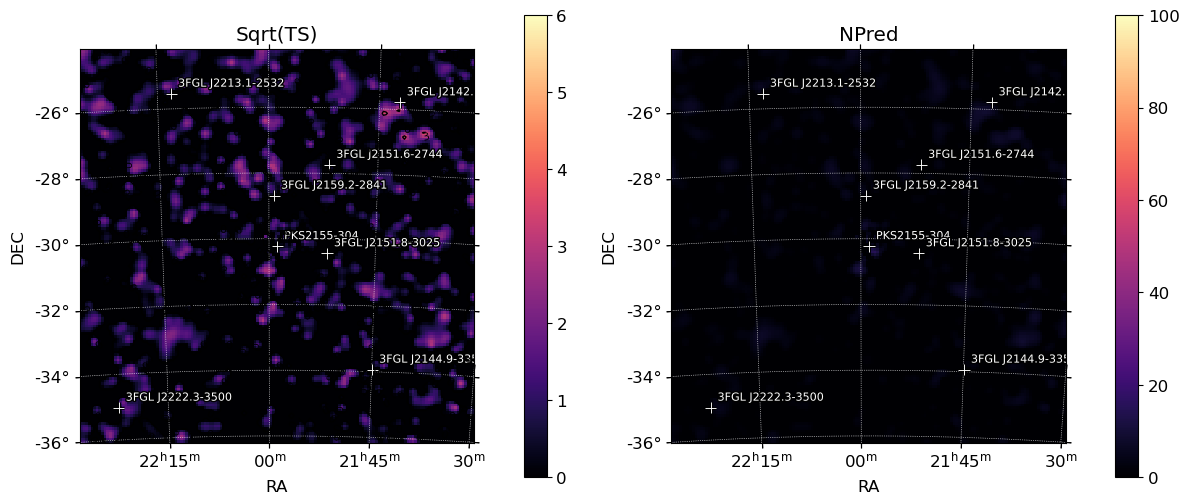

In [56]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_relext['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,5,7],vmin=0,vmax=6,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_relext['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')
plt.show()

In [57]:
resid_relext = gta.residmap('TSmap_relext_TS26',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)

2024-09-24 19:36:45 INFO    GTAnalysis.residmap(): Generating residual maps
2024-09-24 19:36:45 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2024-09-24 19:36:46 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2024-09-24 19:36:47 INFO    GTAnalysis.residmap(): Finished residual maps
2024-09-24 19:36:54 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/chen/PHYS2015A_fermipy_working/notebooks/PKS2155_data/TSmap_relext_TS26_pointsource_powerlaw_2.00_residmap.npy
2024-09-24 19:36:54 INFO    GTAnalysis.residmap(): Execution time: 9.17 s


<Figure size 640x480 with 0 Axes>

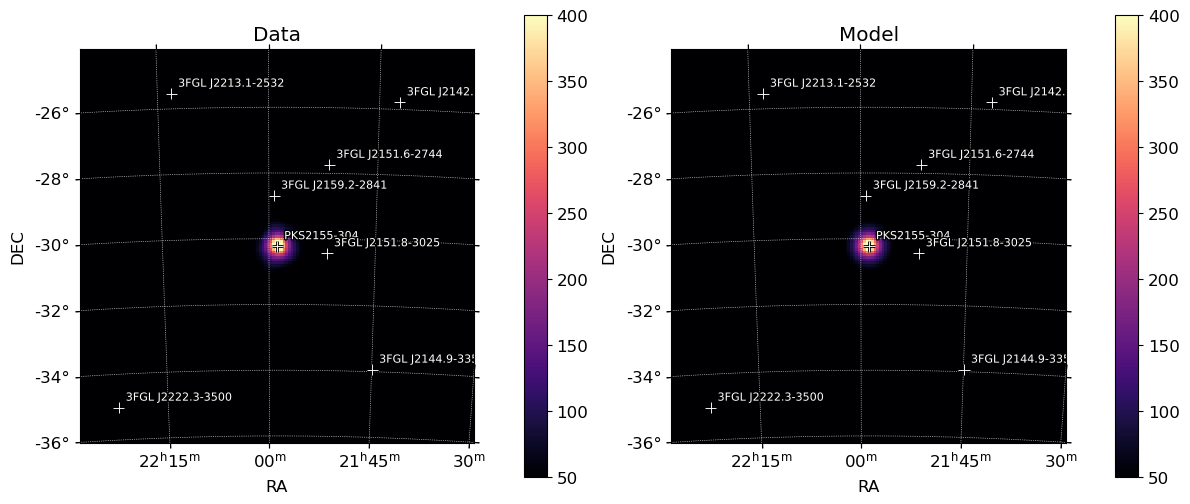

In [58]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid_relext['data'],roi=gta.roi).plot(vmin=50,vmax=400,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid_relext['model'],roi=gta.roi).plot(vmin=50,vmax=400,subplot=122,cmap='magma')
plt.gca().set_title('Model')
plt.show()

<Figure size 640x480 with 0 Axes>

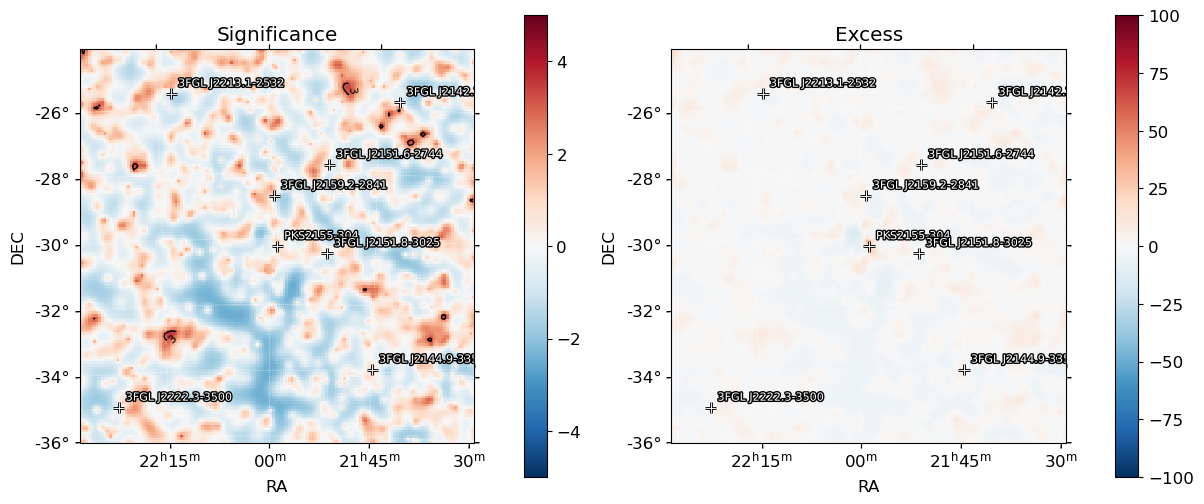

In [59]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid_relext['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid_relext['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')
plt.show()

## Sed Analysis

The sed() method computes a spectral energy distribution (SED) by performing independent fits for the flux normalization of a source in bins of energy. The normalization in each bin is fit using a power-law spectral parameterization with a fixed index. The value of this index can be set with the bin_index parameter or allowed to vary over the energy range according to the local slope of the global spectral model (with the use_local_index parameter).

The free_background, free_radius, and cov_scale parameters control how nuisance parameters are dealt with in the fit. By default the method will fix the parameters of background components ROI when fitting the source normalization in each energy bin (free_background=False). Setting free_background=True will profile the normalizations of all background components that were free when the method was executed. In order to minimize overfitting, background normalization parameters are constrained with priors taken from the global fit. The strength of the priors is controlled with the cov_scale parameter. A larger (smaller) value of cov_scale applies a weaker (stronger) constraint on the background amplitude. Setting cov_scale=None performs an unconstrained fit without priors.


In [79]:
gta.free_sources(free=False)
gta.print_model()
gta.free_sources(skydir=gta.roi[gta.roi.sources[0].name].skydir,distance=[3.0],free=True)
gta.print_model()
sedpks = gta.sed(gta.roi.sources[0].name, bin_index=2.2, outfile='sedPKS.fits', loge_bins=None,write_npy=True,write_fits=True,make_plots=True)

2024-09-24 19:46:20 INFO    GTAnalysis.free_source(): Fixing parameters for PKS2155-304           : ['Prefactor', 'Index']
2024-09-24 19:46:20 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2151.8-3025     : ['norm', 'alpha', 'beta']
2024-09-24 19:46:20 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2159.2-2841     : ['Prefactor', 'Index']
2024-09-24 19:46:20 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J2151.6-2744     : ['Prefactor', 'Index']
2024-09-24 19:46:20 INFO    GTAnalysis.free_source(): Fixing parameters for isodiff               : ['Normalization']
2024-09-24 19:46:20 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Prefactor', 'Index']
2024-09-24 19:46:20 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
PKS2155-304            0.009 232.710  0.000182 

In [66]:
print(sedpks['e_min'])
print(sedpks['e_max'])
print(sedpks['e_ref'])
print(sedpks['flux'])
print(sedpks['eflux'])
print(sedpks['e2dnde'])
print(sedpks['dnde_ul95'])
print(sedpks['ts'])

[  1000.           1330.02559927   1768.92736318   2352.71867628
   3129.10401621   4161.78844433   5535.2851697    7361.90145895
   9791.51739969  13022.66893578  17320.48305538  23036.68585534
  30638.67642017  40750.22396651  54197.59309129  72084.18623012
  95873.81298845 127511.6894751  169593.81120778 225564.11038375]
[  1330.02559927   1768.92736318   2352.71867628   3129.10401621
   4161.78844433   5535.2851697    7361.90145895   9791.51739969
  13022.66893578  17320.48305538  23036.68585534  30638.67642017
  40750.22396651  54197.59309129  72084.18623012  95873.81298845
 127511.6894751  169593.81120778 225564.11038375 299999.13327161]
[  1153.2673581    1533.85744979   2040.04618681   2713.28241415
   3608.69352201   4799.65476418   6383.59020979   8490.24064618
  11292.10739743  15018.61899903  19975.14773436  26567.15196845
  35334.58541089  46995.36207878  62504.31499998  83132.33901468
 110566.86606112 147055.06924831 195587.00660236 260132.73075933]
[5.92591562e-09 4.5558

[2.79313328e-05 2.90146383e-05 2.68272284e-05 3.13276186e-05
 3.46537416e-05 3.73694178e-05 3.55051833e-05 5.14851703e-05
 5.84843064e-05 4.66442853e-05 2.79988221e-05 6.64924289e-05
 5.85570417e-05 6.75460269e-05 5.01172592e-05 6.53377493e-05
 6.08987861e-05 1.51844074e-04 1.08682882e-04 1.44393703e-04]


<Figure size 640x480 with 0 Axes>

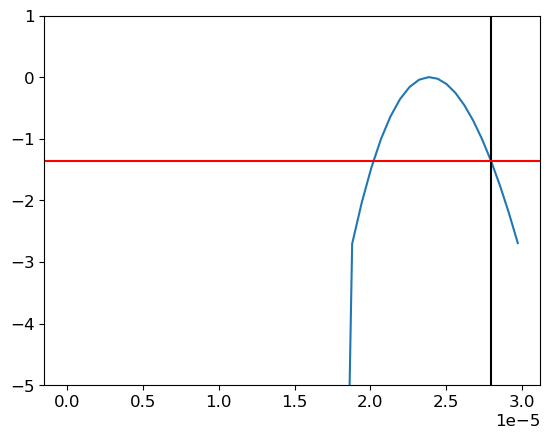

In [67]:
# E^2 x Differential flux ULs in each bin in units of MeV cm^{-2} s^{-1}
print(sedpks['e2dnde_ul95'])

e2dnde_scan = sedpks['norm_scan']*sedpks['ref_e2dnde'][:,None]

plt.clf()
plt.figure()
plt.plot(e2dnde_scan[0],sedpks['dloglike_scan'][0]-np.max(sedpks['dloglike_scan'][0]))
plt.gca().set_ylim(-5,1)
plt.gca().axvline(sedpks['e2dnde_ul95'][0],color='k')
plt.gca().axhline(-2.71/2.,color='r')
plt.show()

<Figure size 640x480 with 0 Axes>

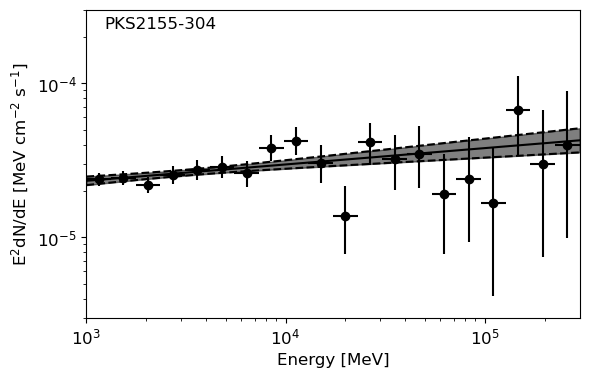

In [75]:
plt.clf()
fig = plt.figure(figsize=(14,4))
ylim=[3E-6,3E-4]
fig.add_subplot(121)
SEDPlotter(sedpks).plot()
plt.gca().set_ylim(ylim)
plt.show()

<Figure size 640x480 with 0 Axes>

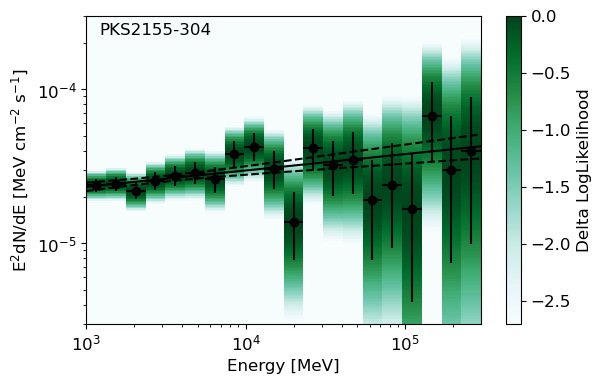

In [76]:
plt.clf()
fig = plt.figure(figsize=(14,4))
fig.add_subplot(121)
SEDPlotter(sedpks).plot(showlnl=True, ylim=ylim)
plt.gca().set_ylim(ylim)
plt.show()

In [85]:
from astropy.table import Table
sed_tab = Table.read('PKS2155_data/sedPKS.fits')
sed_tab.write('PKS2155_data/PKS_2155-304_sed.ecsv',exclude_names=['norm_scan','dloglike_scan'],overwrite=True)